In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#Loading the dataset. 
data = pd.read_csv('amazon_reviews.csv')
data.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [3]:
#Dropping the non-necessary columns that we do not need for the sentiment analysis. 
data.drop(['helpful_yes','helpful_no','score_pos_neg_diff','score_average_rating','wilson_lower_bound'], inplace=True, axis=1)

In [4]:
data.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,total_vote
0,0,NaN,4.0,No issues.,2014-07-23,138,0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0


So, now we're left with the essential data that is required for the sentiment analysis of the same. 

In [5]:
#We'll be drpping the review time as well as day_diff column too as they're not contibuting to the analysis of the data. 
data.drop(['reviewTime','day_diff'], inplace = True, axis=1)


In [6]:
data.head()

,Unnamed: 0,reviewerName,overall,reviewText,total_vote
0,0,NaN,4.0,No issues.,0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",0
2,2,1K3,4.0,it works as expected. I should have sprung for...,0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",0


We've removed the non-essential columns fronm the dataset and now we're left with the essential ones. 

In [7]:
data.shape

(4915, 5)

In [8]:
data.drop('Unnamed: 0', inplace = True, axis =1)

In [9]:
data.shape

(4915, 4)

In [10]:
data.tail(10)

,reviewerName,overall,reviewText,total_vote
4905,zht,5.0,So far so good. I use this with my mobil phone...,0
4906,Zigcarruse,5.0,it worked just like you would expect a micro S...,0
4907,Zim5,5.0,MicroSD card works flawlessly with my digital ...,0
4908,Zimms,5.0,"I really wanted a 128 GB card, but at less tha...",0
4909,Zman,5.0,I bought this to stretch the capability of my ...,0
4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,0
4911,Zo,5.0,Used this for extending the capabilities of my...,0
4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,0
4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,0
4914,Zza,5.0,I've heard bad things about this 64gb Micro SD...,0


So, here we can see that we're left only with 3 important columns. The columns being: 
1. Reviewer name: The name of the user posting the review of the same. 
2. Overall: This column represents the rating of the product(The max being 5.0 and the minimum being 1.0)
3. reviewText: The textual review posted by the amazon reviews. 
So, these are the three columns that we're left with.

Now let's check if any of these columns have any missing values for the proper analysis of the data.

In [11]:
print(data.isnull().sum())

reviewerName    1
overall         0
reviewText      1
total_vote      0
dtype: int64


Here, we can see that there are some missing or null values in the dataset. The numer of null values are very small as compared to the whole dataset so we'll be eliminating/dropping the rows with the null values. 

In [12]:
data.dropna(inplace = True)

In [13]:
print(data.isnull().sum())

reviewerName    0
overall         0
reviewText      0
total_vote      0
dtype: int64


So, now we have zero null values in the dataset and hence we can proceed with the data analysis. 

Now I'll clean the dataset and remove any puntuations using NLP. 

In [14]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["reviewText"] = data["reviewText"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


We're done with the data cleaning part now we'll move ahead with the data visulaization part. 

We'll move column to column and firstly we'll visualize the 'overall' column that is also defined as user ratings of the product.

In [15]:
ratings = data["overall"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

We can see that 79.8% of the total people have provided 5 star ratings to their product which means that they're happy with their product. 

Now we'll see the type of reviews users have left on the webiste with the amazing data visulization tool, wordcloud. 

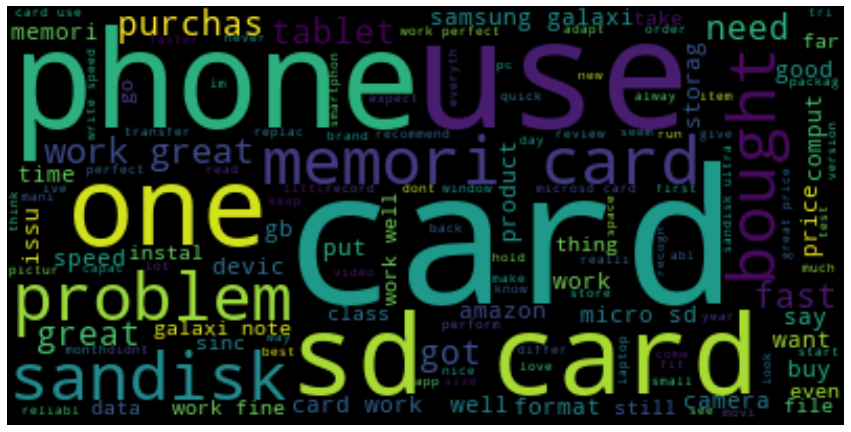

In [16]:
text = " ".join(i for i in data.reviewText)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now, let's add three more columns namely Positive, Negative, and, Neutral for presenting the sentiment scores of the Amazon reviews. 

In [17]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["reviewText"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["reviewText"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["reviewText"]]
data = data[["reviewText", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                          reviewText  Positive  Negative  \
1  purchas devic work advertis never much phone m...     0.000       0.0   
2  work expect sprung higher capac  think made bi...     0.172       0.0   
3  think work greathad diff bran  card went south...     0.087       0.0   
4  bought retail packag arriv legit orang envelop...     0.235       0.0   
5  mini storag  doesnt anyth els suppos  purchas ...     0.000       0.0   

   Neutral  
1    1.000  
2    0.828  
3    0.913  
4    0.765  
5    1.000  


Now that we've added new columns to the dataset, we can see the type of response on every product by the user.

Now let's see which is the most occuring response in this Amazon review dataset.

In [18]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


Here we can see that the most of the reviews are neutral, which means customers are neither happy nor angry with their respective products. 

Now let's see the total sentiment score for all the reviews posted by the users. 

In [19]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  1101.8430000000005
Negative:  254.52699999999976
Neutral:  3556.628999999995


So we can see that most users provided neutral feedback to the services/products offered by Amazon, and there are a small amount of Negative reviews that pretty much sums up the satisafaction level of all the user. 

So, this was the sentiment analysis of Amazon reviews, we can further perform various other models (Like LSTM or Deep learning models)according to the specification or request from the client or the company. 